In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

In [2]:
#importing dataset
df = pd.read_csv("titanic.csv")

In [3]:
#calculating percentages of survival
unsurvived=(df["Survived"].value_counts(normalize=True)[0]*100).round(2)
survived=(df["Survived"].value_counts(normalize=True)[1]*100).round(2)
print("Survived percentage : %{} \nNot Survived percentage : %{} ". format(survived,unsurvived))

Survived percentage : %38.56 
Not Survived percentage : %61.44 


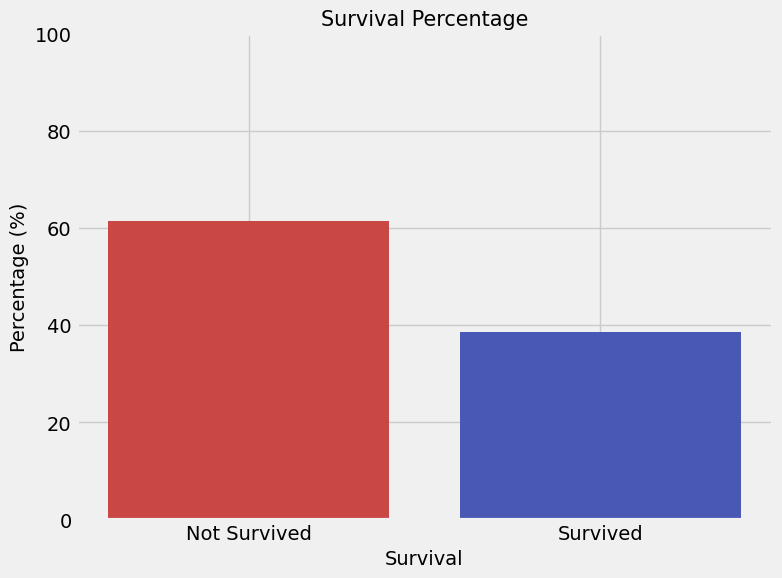

In [4]:
#define categories and values
categories = ['Not Survived', 'Survived']
values = [unsurvived, survived]

#plotting the bar chart
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8, 6)) 
plt.bar(categories, values,color=['#C94845', '#4958B5'])
plt.xlabel('Survival')
plt.ylabel('Percentage (%)')
plt.ylim(0,100)
plt.title('Survival Percentage', size =15)
plt.show()

In [5]:
#calculate the survival ratios for each combination of Pclass and Sex
survival_ratios = df.groupby(['Pclass', 'Sex'])['Survived'].value_counts(normalize=True) * 100

#iterate over each combination and print the survival and non-survival ratios
for pclass, sex, survived in survival_ratios.index:
    ratio = survival_ratios[pclass, sex, survived]
    status = "Survived" if survived == 1 else "Not Survived"
    print(f"Pclass {pclass}, Sex: {sex}, {status} Ratio: {ratio:.2f}%")

Pclass 1, Sex: female, Survived Ratio: 96.81%
Pclass 1, Sex: female, Not Survived Ratio: 3.19%
Pclass 1, Sex: male, Not Survived Ratio: 63.11%
Pclass 1, Sex: male, Survived Ratio: 36.89%
Pclass 2, Sex: female, Survived Ratio: 92.11%
Pclass 2, Sex: female, Not Survived Ratio: 7.89%
Pclass 2, Sex: male, Not Survived Ratio: 84.26%
Pclass 2, Sex: male, Survived Ratio: 15.74%
Pclass 3, Sex: female, Not Survived Ratio: 50.00%
Pclass 3, Sex: female, Survived Ratio: 50.00%
Pclass 3, Sex: male, Not Survived Ratio: 86.30%
Pclass 3, Sex: male, Survived Ratio: 13.70%


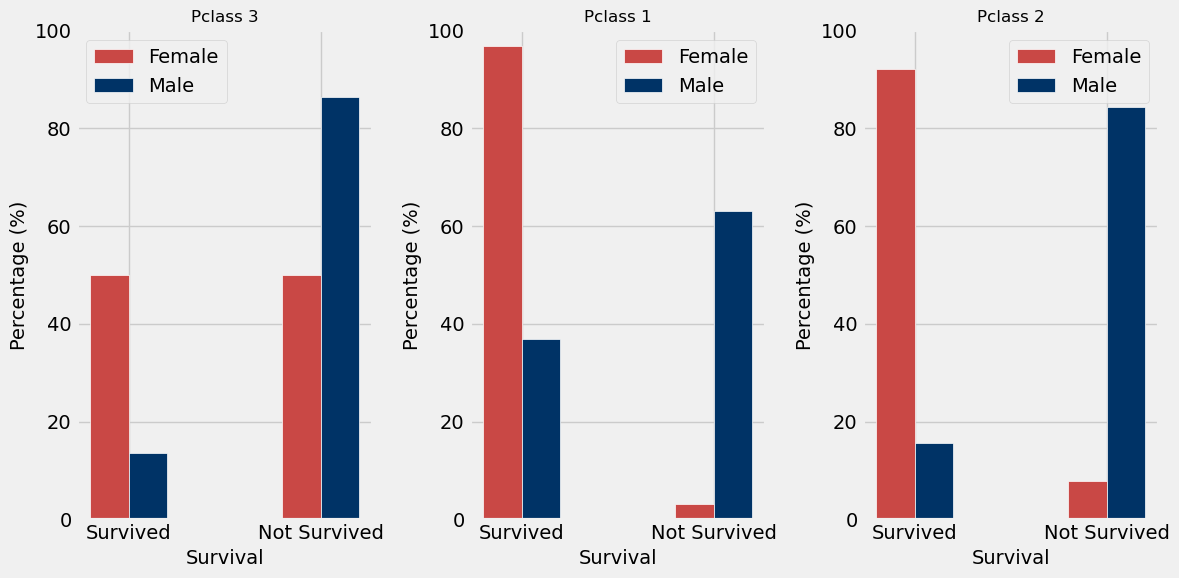

In [6]:
#get unique passenger classes
pclasses = df['Pclass'].unique()

#define the categories for the bar chart
categories = ['Survived', 'Not Survived']

#set the width of the bars
bar_width = 0.2

#create subplots for each passenger class
fig, axes = plt.subplots(nrows=1, ncols=len(pclasses), figsize=(12, 6))

for i, pclass in enumerate(pclasses):
    #create lists to store the survival and non-survival ratios for each combination sex dependent
    female_ratios = [survival_ratios[pclass, 'female', 1], survival_ratios[pclass, 'female', 0]]
    male_ratios = [survival_ratios[pclass, 'male', 1], survival_ratios[pclass, 'male', 0]]

    #set the positions of the bars on the x-axis
    r1 = np.arange(len(female_ratios))
    r2 = [x + bar_width for x in r1]

    #plot the bar chart for the passenger class
    ax = axes[i]
    ax.bar(r1, female_ratios, color='#C94845', width=bar_width, edgecolor='white', label='Female')
    ax.bar(r2, male_ratios, color='#003366', width=bar_width, edgecolor='white', label='Male')
    ax.set_xlabel('Survival')
    ax.set_ylabel('Percentage (%)')
    ax.set_ylim(0, 100)
    ax.set_title(f'Pclass {pclass}', fontsize=12)
    ax.set_xticks([r + bar_width/2 for r in range(len(female_ratios))])
    ax.set_xticklabels(categories)
    ax.legend()

plt.tight_layout()

#display the plot
plt.show()


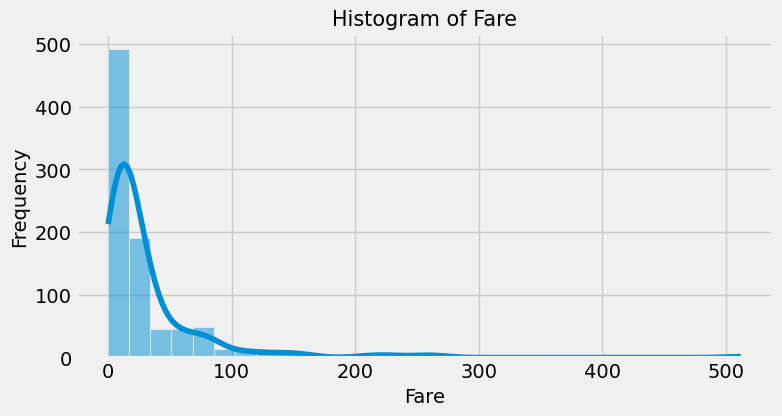

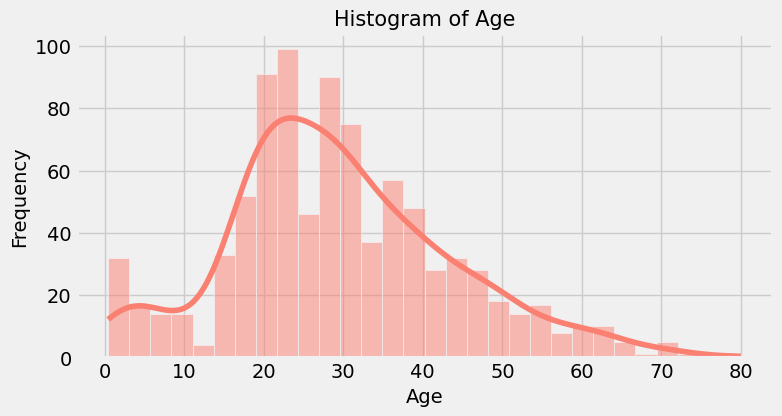

In [7]:
#set the figure size and style
plt.figure(figsize=(8, 4))  
plt.style.use('fivethirtyeight')

#plot histogram for Fare with kde
sns.histplot(df['Fare'], bins=30, kde=True)  
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Histogram of Fare', size =15)
plt.show()

#plot histogram for Age with kde
plt.figure(figsize=(8, 4))  # Set the figure size

sns.histplot(df['Age'].dropna(), bins=30, color='salmon',kde=True)  # Plot Age histogram, excluding missing values
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age', size =15)
plt.show()

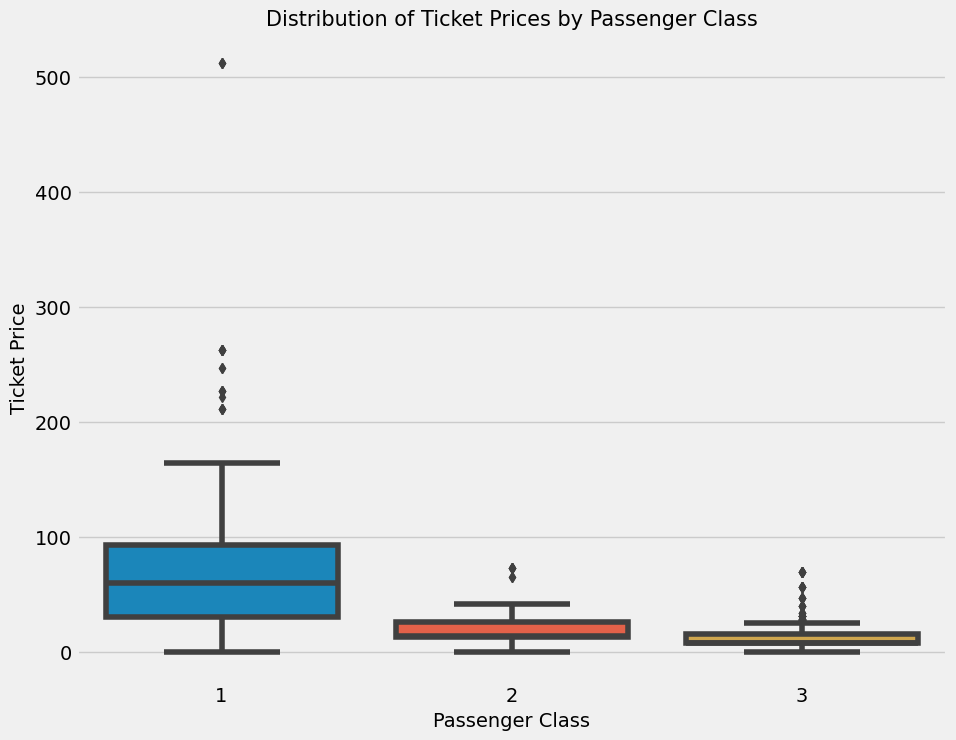

In [8]:
plt.figure(figsize=(10, 8))

#plot boxplot for each passenger class fare distribution
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.xlabel('Passenger Class')
plt.ylabel('Ticket Price')
plt.title('Distribution of Ticket Prices by Passenger Class', size =15)

plt.show()

In [9]:
#target and categories are set
X = df.drop("Survived", axis=1)
y = df["Survived"]

#encoding categorical variables
X = pd.get_dummies(X)

#splitting the data into training and test sets (70% for training, 30% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#creating and fitting the KNN classifier
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

#predicting the target variable for the test set
y_pred = knn.predict(X_test)

#calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy.round(3))


Accuracy: 0.734


In [10]:
#target and categories are set
X = df.drop("Survived", axis=1)
y = df["Survived"]

#encoding categorical variables
X = pd.get_dummies(X)

#splitting the data into training and test sets (70% for training, 30% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#creating the KNN classifier
knn_tuned = KNeighborsClassifier()

#defining the parameter grid for GridSearchCV
param_grid = {'n_neighbors': [3, 5, 7, 9, 11],'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

#creating the GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(knn_tuned, param_grid, cv=5)

#fitting the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

#getting the best estimator and its parameters
best_knn = grid_search.best_estimator_
best_params = grid_search.best_params_

#predicting the target variable for the test set using the best estimator
y_pred = best_knn.predict(X_test)

#calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Best Parameters:", best_params)
print("GridSearch Tuned Accuracy:", accuracy.round(3))

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
GridSearch Tuned Accuracy: 0.779
